In [ ]:
# keywords

# postgreSQL, matplotlib, psycopg2, subplots, дисперсия, var, heatmap, hist, корреляционная матрица, corr

## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [1]:
### YOUR CODE HERE ###

import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pg_connection = {
    "host": "",
    "port": ,
    "dbname": "",
    "user": "",
    "password": ""
}
conn = psycopg2.connect(**pg_connection)
start_df = pd.read_sql_query('SELECT * FROM exploratory', conn)

In [3]:
start_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.4399302341553932,-2.180960698389708,33.4684964804719,-1.9273880121739875,-5.3213919475057105
1,1.7705797495879034,-1.174880454210172,0.9895926481354946,-1.1396809115663187,-2.0802195404111687
2,0.7428169764168391,-0.2634829113111655,0.16814863490368492,-0.3324379721161745,-0.19571957951766614
3,-1.510891800324271,2.7125712625192238,-2.6856430298672915,2.0584952423727403,-4.098401678335551
4,-0.4835110394772655,0.096511221663355,-0.028703495808161117,0.1687629004635419,-0.04666424110766956


In [4]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
feature_1    100 non-null object
feature_2    100 non-null object
feature_3    100 non-null object
feature_4    100 non-null object
feature_5    100 non-null object
dtypes: object(5)
memory usage: 4.0+ KB


In [5]:
start_df['feature_1'] = start_df.feature_1.astype('float64')
start_df['feature_2'] = start_df.feature_2.astype('float64')
start_df['feature_3'] = start_df.feature_3.astype('float64')
start_df['feature_4'] = start_df.feature_4.astype('float64')
start_df['feature_5'] = start_df.feature_5.astype('float64')

In [6]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
feature_1    100 non-null float64
feature_2    100 non-null float64
feature_3    100 non-null float64
feature_4    100 non-null float64
feature_5    100 non-null float64
dtypes: float64(5)
memory usage: 4.0 KB


In [7]:
start_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.439930,-2.180961,33.468496,-1.927388,-5.321392
1,1.770580,-1.174880,0.989593,-1.139681,-2.080220
2,0.742817,-0.263483,0.168149,-0.332438,-0.195720
3,-1.510892,2.712571,-2.685643,2.058495,-4.098402
4,-0.483511,0.096511,-0.028703,0.168763,-0.046664


Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной.

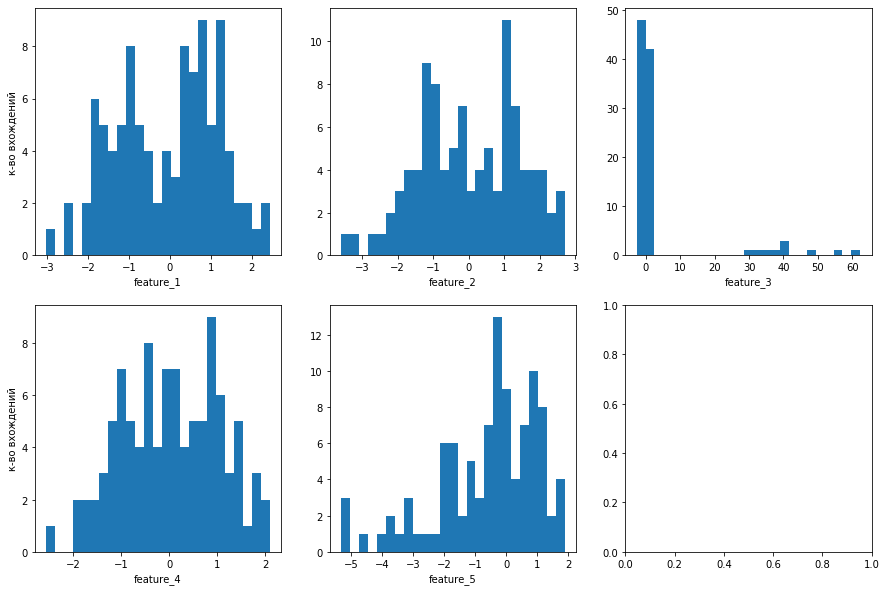

In [8]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax1.hist(start_df['feature_1'].values, bins = 25)
ax1.set_ylabel('к-во вхождений')
ax1.set_xlabel('feature_1')
ax2.hist(start_df['feature_2'].values, bins = 25)
ax2.set_xlabel('feature_2')
ax3.hist(start_df['feature_3'].values, bins = 25)
ax3.set_xlabel('feature_3')
ax4.hist(start_df['feature_4'].values, bins = 25)
ax4.set_ylabel('к-во вхождений')
ax4.set_xlabel('feature_4')
ax5.hist(start_df['feature_5'].values, bins = 25)
ax5.set_xlabel('feature_5');

In [9]:
# Плотность feature_4 возрастает от -2 к -1 и падает от 1 к 2. Есть пиковые значения в -1, -0.5, 0, +1 - возможно
# многомодальное распределение (или нужно больше данных). 

# В случаях feature_1 и feature_2 есть два пика на +1 и -1, плотность возрастает по краям от -2 к -1 и падает от 1 к 2.
# В нуле - плотность ниже, чем в -1 и 1 - возможно бимодальное распределение.

# feature_5 более плотно распределена около нуля и +1, заметна отрицательная асимметрия.

# В случае feature_3 выбросы сильно искажают распределение. Ниже сделал гистограмму для feature_3, где исключены выбросы - 
# Есть три пика в -1, 0 и +1

In [10]:
series3 = start_df['feature_3'][start_df['feature_3'] < 10]

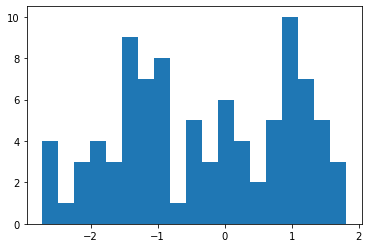

In [11]:
plt.hist(series3.values, bins = 19);

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

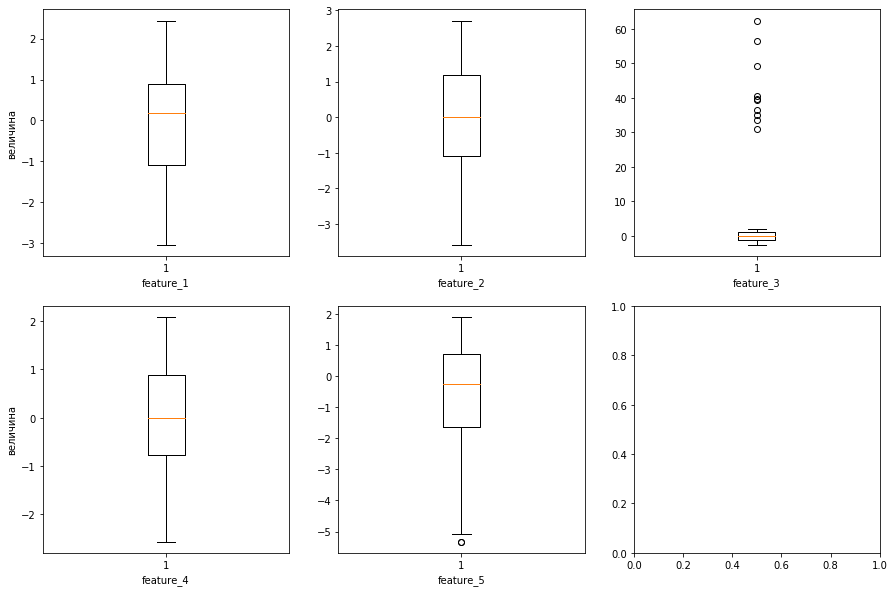

In [12]:
### YOUR CODE HERE ###
fig1, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax1.boxplot(start_df['feature_1'])
ax1.set_ylabel('величина')
ax1.set_xlabel('feature_1')
ax2.boxplot(start_df['feature_2'])
ax2.set_xlabel('feature_2')
ax3.boxplot(start_df['feature_3'])
ax3.set_xlabel('feature_3')
ax4.boxplot(start_df['feature_4'])
ax4.set_ylabel('величина')
ax4.set_xlabel('feature_4')
ax5.boxplot(start_df['feature_5'])
ax5.set_xlabel('feature_5');

In [13]:
# feature_1: медиана чуть смещена к верхнему квартилю, а наблюдаемый максимум ближе к нулю, чем наблюдаемый минимум.
# Т.е в положительной области больше плотность, есть небольшая асимметрия в сторону отрицательных значений.

# feature_2: почти симметрична, но в отрицательную область чуть больше отклонения.

# feature_3: много выбросов. Ниже построен boxplot с исключением выбросов - получилось почти симметрично относительно -0,5.

# feature_4: немного асимметрично в отрицательную сторону.

# feature_5: есть выбросы, сильная асимметрия в отрицательную сторону.

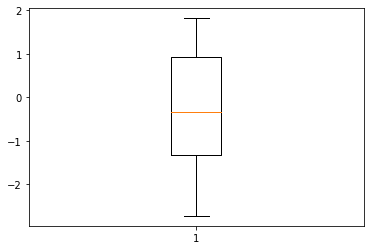

In [14]:
plt.boxplot(series3);

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

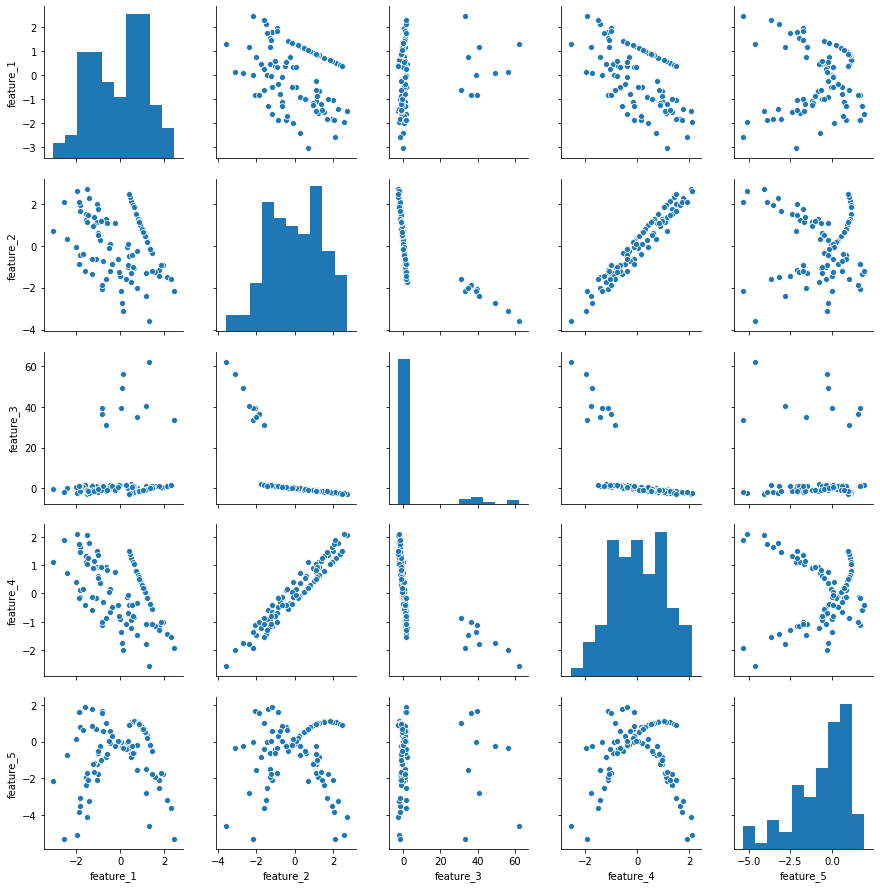

In [15]:
### YOUR CODE HERE ###

import seaborn as sns
sns.pairplot(start_df);

In [16]:
# В модель регрессии можно включить следующие пары переменных:
# feature_1 и feature_2 - возможно, обратная зависимость.
# feature_1 и feature_4 - обратная зависимость
# feature_2 и feature_4 - прямая зависимость

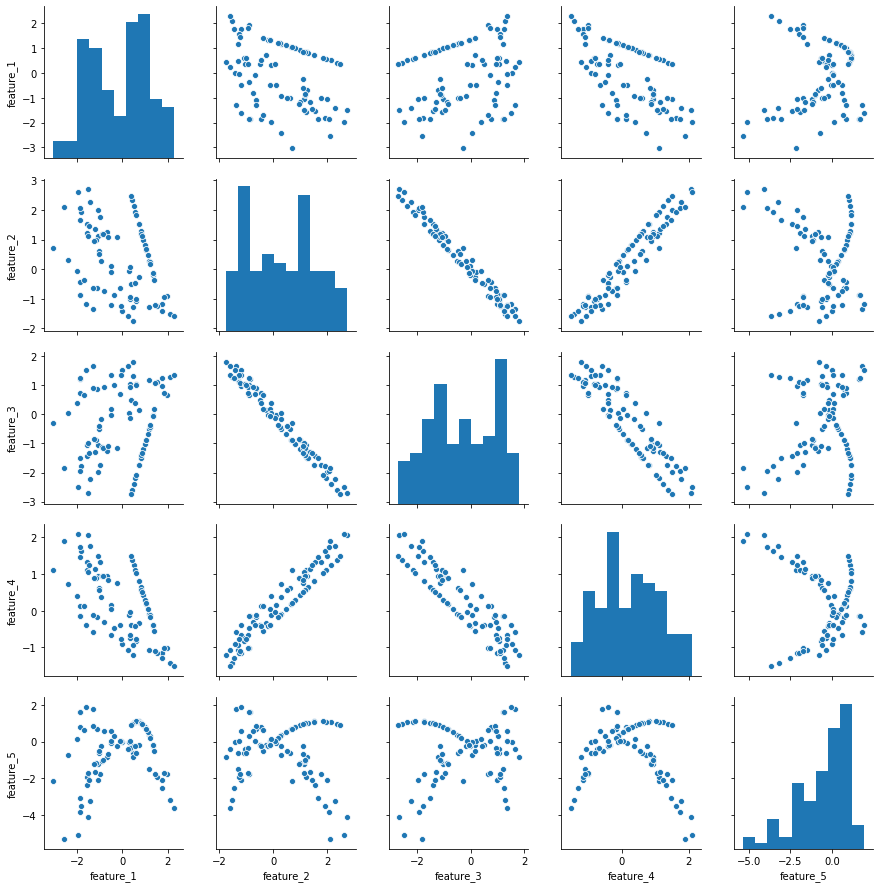

In [17]:
outbursts_cleared_df = start_df[start_df['feature_3'] < 10]
sns.pairplot(outbursts_cleared_df);

In [18]:
# После удаления выбросов из feature_3 в модель регрессии можно включить следующие пары переменных:
# feature_1 и feature_2 - возможно, обратная зависимость.
# feature_1 и feature_3 - возможно, прямая зависимость.
# feature_1 и feature_4 - обратная зависимость
# feature_2 и feature_3 - обратная зависимость
# feature_2 и feature_4 - прямая зависимость
# feature_3 и feature_4 - обратная зависимость